# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# read the data
df = pd.read_csv('foodhub_order (1).csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [3]:
# checking shape of the data
print("There are", df.shape[0], 'rows and', df.shape[1], "columns.")

There are 1898 rows and 9 columns.


#### Observations:
The DataFrame has 1898 rows and 9 columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [4]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
There are 5 numerical columns in the data and 4 object type columns.

Rating column is being read as object type column but it should be in a numerical format.

Order_id and Customer_id are read as integer type columns but it should be object columns since they are categorical variables.

In [5]:
# let's see why Rating column has object data type
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

#### Observations:
Since the Rating column has a wrong data type, we can reassign the 'Not given' rating the number zero number.

In [6]:
# replacing values with 0
df['rating'] = df['rating'].replace(['Not given'],0)

# changing the data type to float
df['rating'] = df['rating'].astype(float)

In [7]:
# changing the data type of Order_id and Customer_id columns
df['order_id'] = df['order_id'].astype(object)
df['customer_id'] = df['customer_id'].astype(object)

In [8]:
# let's check the data type of columns again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   object 
 1   customer_id            1898 non-null   object 
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 133.6+ KB


#### Observations:
There are a total of 1898 non-null observations in each of the columns

Total memory usage is approximately 133.6 KB

Now, dataset has 5 object types ('restaurant_name', 'cuisine_type', 'day_of_the_week', 'rating'), 1 float type ('cost_of_the_order') and 2 integer types ('food_preparation_time', 'delivery_time')


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [9]:
df.isnull().values.any()

False

In [10]:
# Checking for missing values in the data
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
There are no missing values in the data

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cost_of_the_order,1898.0,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
rating,1898.0,2.659642,2.195280,0.00,0.00,4.00,5.0000,5.00
food_preparation_time,1898.0,27.371970,4.632481,20.00,23.00,27.00,31.0000,35.00
delivery_time,1898.0,24.161749,4.972637,15.00,20.00,25.00,28.0000,33.00


#### Observations:
it takes a minimum of 20 minutes, an average of 27.37 minutes and a maximum of 35 minutes to prepare the food once the order is placed

### **Question 5:** How many orders are not rated? [1 mark]

In [12]:
df['rating'].value_counts(dropna=False)

0.0    736
5.0    588
4.0    386
3.0    188
Name: rating, dtype: int64

In [13]:
df['rating'].value_counts(normalize=True)

0.0    0.387777
5.0    0.309800
4.0    0.203372
3.0    0.099052
Name: rating, dtype: float64

#### Observations:
Having converted the rating 'Not Given' value to zero, the count of zeros represent the same hence 736 orders out of 1898 orders are not rated by customers were not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#### Order ID

In [14]:
# check unique order ID
df['order_id'].nunique()

1898

#### Observations:
There are 1898 unique orders which indicates that our data is unique at order_id level.

#### Customer ID

In [15]:
# check unique customer ID
df['customer_id'].value_counts().shape

(1200,)

#### Observations:
There are 1200 unique customers. Even though "customer id" is just a variable that lets us find out who a customer is, we can see that some customers have placed more than one order.
Let's look at the IDs of the top 5 customers who have bought the most.

In [16]:
# Groupby with order id which is unique number with customer ID
df['customer_id'].value_counts().head()

52832     13
47440     10
83287      9
250494     8
259341     7
Name: customer_id, dtype: int64

#### Observations:
Customer with ID 52832 has ordered 13 times.

#### Restaurant name

In [17]:
# check unique Restaurant Name
df['restaurant_name'].nunique()

178

In [18]:
df['restaurant_name'].value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

#### Observations:
There are 178 unique restaurants in the dataset

The restaurant that has received maximum number of orders is Shake Shack (219)

#### Cost of the order

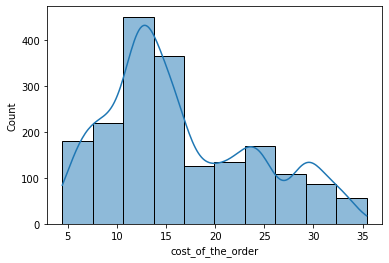

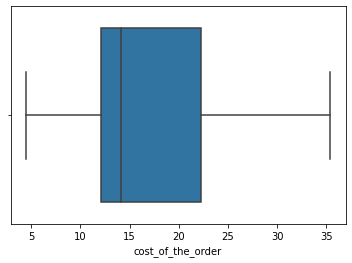

In [19]:
sns.histplot(data = df, x='cost_of_the_order',bins = 10, stat = 'count',kde=True)
plt.show()
sns.boxplot(data = df, x='cost_of_the_order')
plt.show();

#### Observations:
Basically cost of the order is between approximately 4 dollars to 36 dollars.

The right-skewed distribution indicates that the average cost of the order is more than its median cost (14 dollars).

The distribution's mode (peak) indicates that the majority of consumers like to order food that costs around 13 dollars and another slight peak around 25 dollars.

There are few orders that exceed 30 dollars in price. These orders may contain pricey dinners.

#### Cuisine Type

In [20]:
# Check unique cuisine type
df['cuisine_type'].nunique()

14

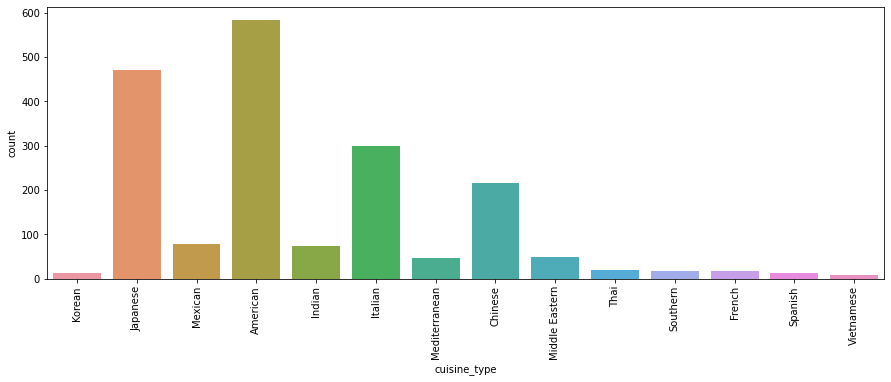

In [21]:
plt.figure(figsize = (15,5))
sns.countplot(data=df,x='cuisine_type')
plt.xticks(rotation=90)
plt.show()

#### Observations:
There are 14 unique type of cuisines.

American cusine is most ordered ( more than 590 times) followed by Japanese (more than 490 times), Italian (almost 300 times) & Chinese (almost 200 times).

Most people don't like Vietnamese food.


#### Rating

In [22]:
# Check the unique values
df['rating'].value_counts()

0.0    736
5.0    588
4.0    386
3.0    188
Name: rating, dtype: int64

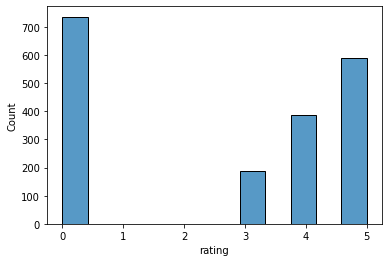

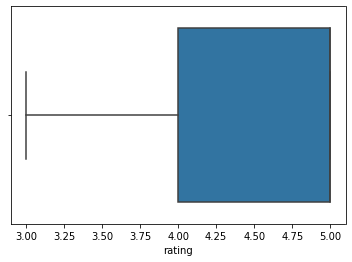

In [23]:
# For rating we eliminate unrated rows to prevent bias
df1 = df[df['rating']!= 0]

sns.histplot(data = df, x='rating')
plt.show()
sns.boxplot(data = df1, x='rating')
plt.show();

#### Observations:
The distribution of 'rating' shows that there are about 38.77% unrated orders, followed by a rating of 5 (around 31%).

Only 10% orders have been rated 3

The boxplot is heavily skewed to the left means it is negatively skewed

#### Day of the week

In [24]:
# Check the unique values
df['day_of_the_week'].value_counts()

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

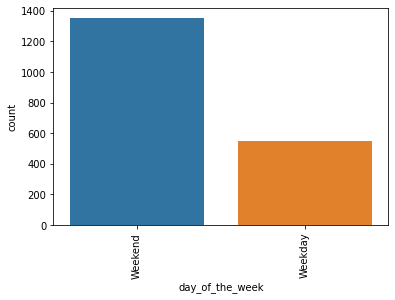

In [25]:
sns.countplot(data=df,x='day_of_the_week')
plt.xticks(rotation=90)
plt.show()

#### Observations:
The 'day_of_the_week' columns consists of 2 unique values - Weekday and Weekend

The distribution shows that around 1351 orders are placed on weekends, which 800 more than that of the weekday.

#### Food preparation time

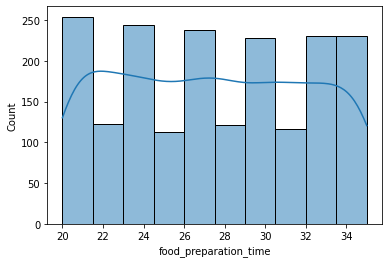

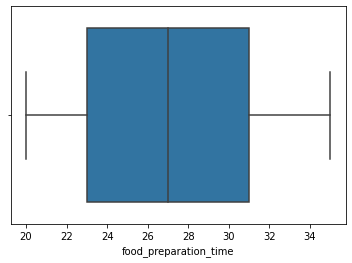

In [26]:
sns.histplot(data = df, x='food_preparation_time',bins = 10, stat = 'count',kde = True)
plt.show()
sns.boxplot(data = df, x='food_preparation_time')
plt.show();


#### Observations:
The average time to prepare an order is 27 minutes which is similar to the median food preparation times. This means the distribution is nearly symmetrical.

The time it takes to make food is pretty even between 20 and 35 minutes.

This column doesn't have any outliers.


#### Delivery time

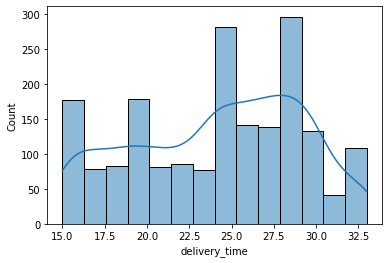

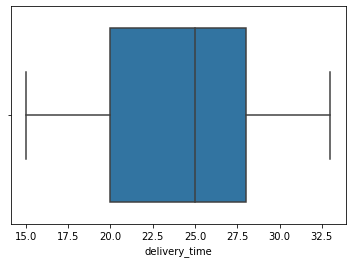

In [27]:
sns.histplot(data = df, x='delivery_time', stat = 'count',kde = True,)
plt.show()
sns.boxplot(data = df, x='delivery_time')
plt.show();

#### Observations:
From the histplot we can determine that most orders take between 24 and 28 minutes to to get to their destination.

The distribution is a little bit skewed to the left because the average delivery time is less than the median delivery time.

Minimum delivery time is 15 mins and maximum is 33 mins. 

This column doesn't have any outliers.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [28]:
df[['restaurant_name','order_id']].groupby('restaurant_name').count().sort_values(by = 'order_id', ascending=False).head(5)

,order_id
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:
Shake Shack has the most orders, with 219, followed by The Meatball Shop, Blue Ribbon Sushi, and Blue Ribbon Fried Chicken & Parm, each of which has 132, 119, 96, and 68 orders. Together, these five restaurants make up the top five in terms of orders.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [29]:
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts().reset_index()

,index,cuisine_type
0,American,415
1,Japanese,335
2,Italian,207
3,Chinese,163
4,Mexican,53
5,Indian,49
6,Mediterranean,32
7,Middle Eastern,32
8,Thai,15
9,French,13


#### Observations:
The most popular cuisine type on weekends is American with 415 orders

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [30]:
# Do a count of orders with cost above $20
orders_above20 = df.loc[(df['cost_of_the_order'] > 20)]['cost_of_the_order'].count()
print('The number of total orders that cost above 20 dollars is:', orders_above20)
# Compute the percent of the orders above $20
percentage_above20 = round((orders_above20/df.shape[0])*100,2) # Rounded to two decimal places
print("Percentage of orders above 20 dollars:", percentage_above20,'%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


#### Observations:
Percentage of orders which has more than 20 dollars is 29.24%

### **Question 10**: What is the mean order delivery time? [1 mark]

In [31]:
mean_del_time = df['delivery_time'].mean()

print('The mean delivery time for this dataset is', round(mean_del_time, 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


#### Observations:
On average, it takes 24.16 minutes for the ready orders to be brought to the customer.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [32]:
df[['order_id','customer_id']].groupby('customer_id').count().sort_values(by = 'order_id',axis = 0, ascending=False).head(3)

,order_id
customer_id,
52832,13
47440,10
83287,9


#### Observations:
Customers 52832, 47440 and 83287 are the top 3 regular purchasers; therefore, they will receive a 20% discount on future sales.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


#### Correlation among variables

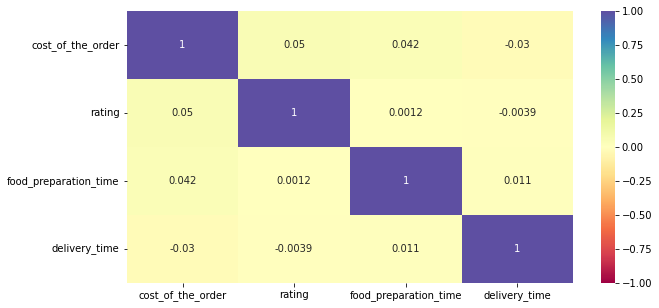

In [33]:
# Plot the heatmap 
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

#### Observations:

Cost of the order has a negative correlation with Delivery time column. This indicates as the delivery time decreases the selling price of a order will increase.

Rating has a negative correlation with Delivery time column. This indicates that the rating would be higher if the delivery time is shorter.

Food preparation time and cost of order have very less positive correlation. 

Food preparation time and delivery time have very less positive correlation as well.

Therefore, the heatmap shows very weak correlation between the variables.


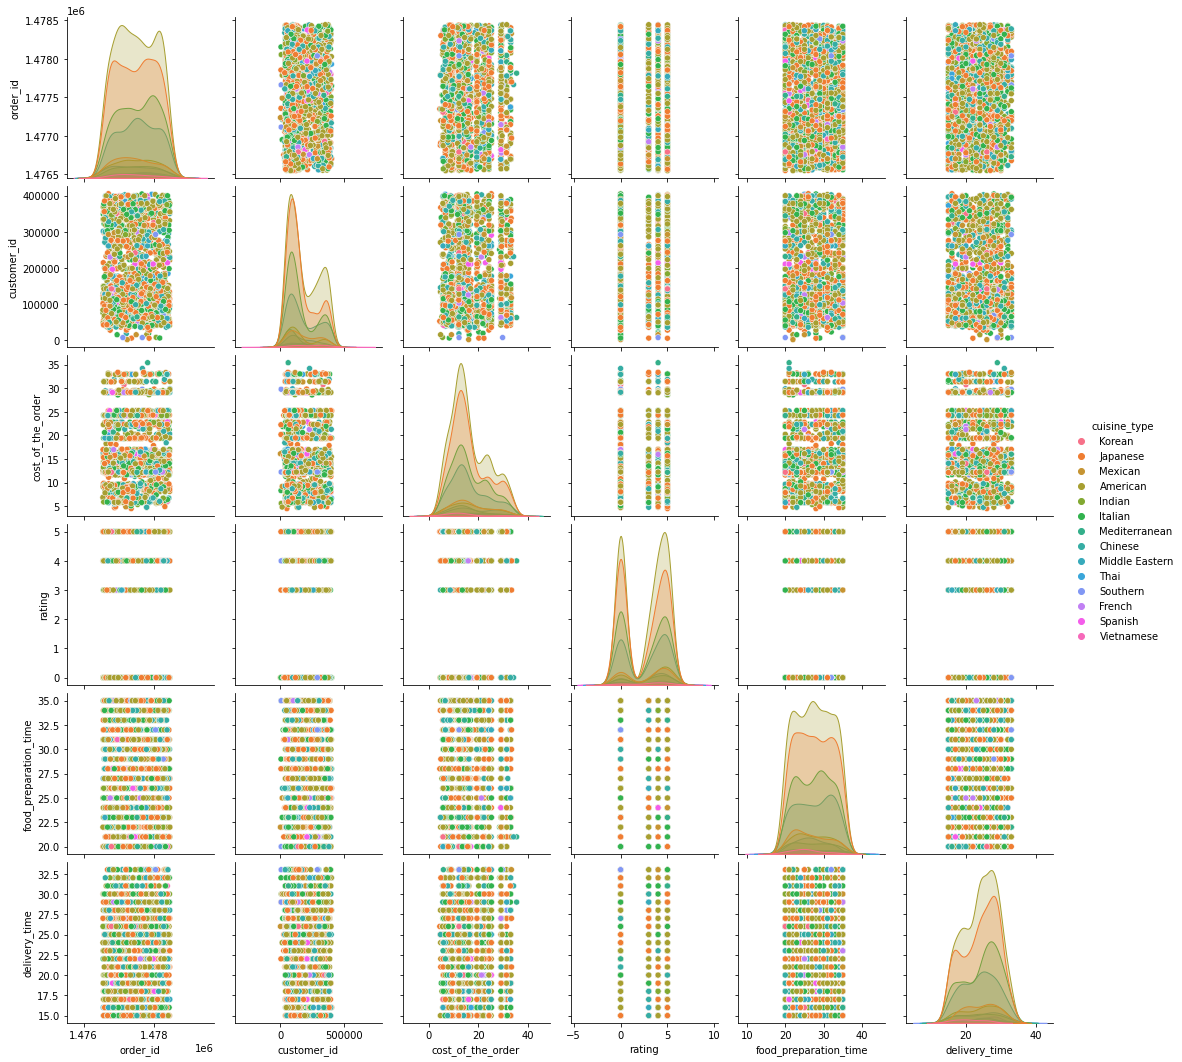

In [34]:
# Plot the pairplot
sns.pairplot(df, hue="cuisine_type")

#### Observations:
There are no linear relationship between the columns. 

#### Cuisine vs Cost of the order

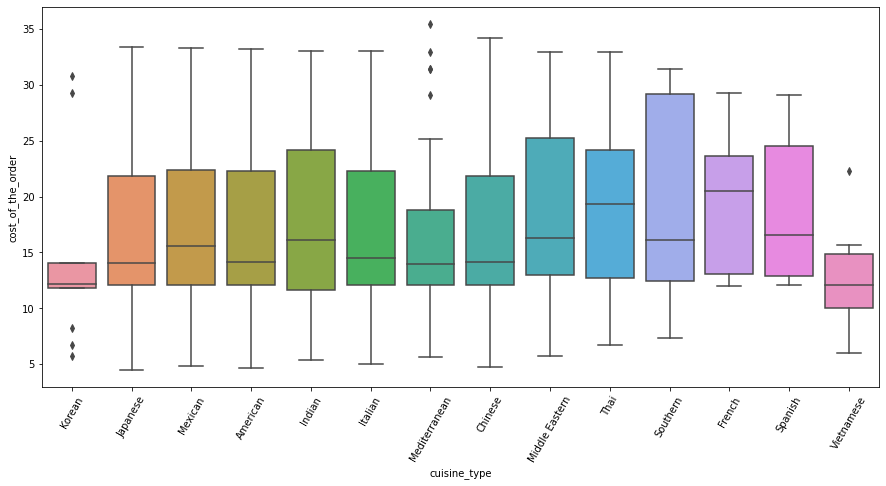

In [35]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df,x = "cuisine_type", y = "cost_of_the_order")
plt.xticks(rotation=60)
plt.show();

#### Observations:
French cusine type is the most expensive, which is followed by Korean cuisine.

Vietnamese and Korean food cost less than other types of food.

Boxplots for Italian, American, Chinese, and Japanese food are mostly the same. This means that the quartile costs for these types of food are pretty close.

Outliers are present for the cost of Korean, Mediterranean and Vietnamese cuisines.

#### Cuisine vs Food Preparation time


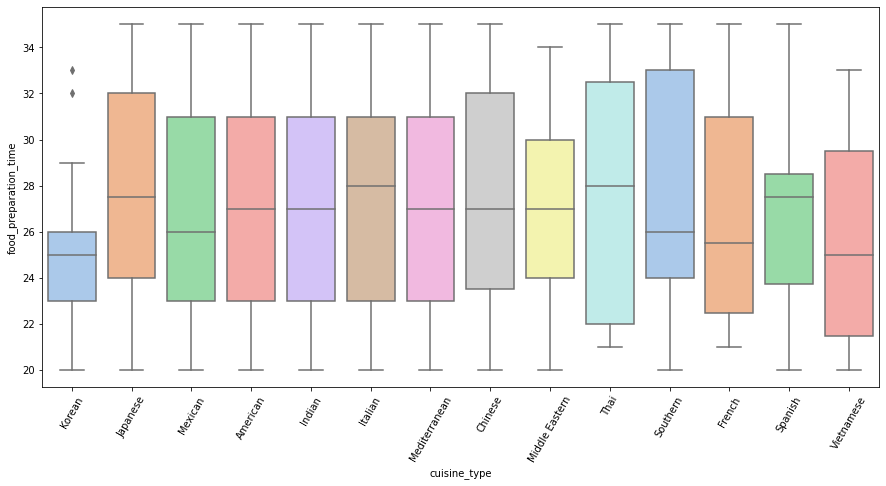

<Figure size 1080x504 with 0 Axes>

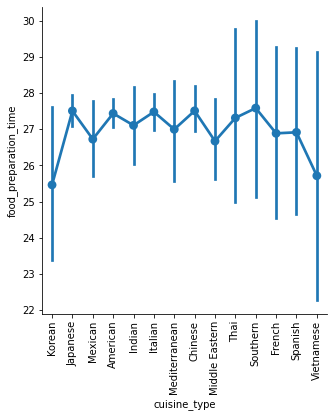

In [36]:
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, palette = 'pastel')
plt.xticks(rotation = 60)
plt.show()

plt.figure(figsize=(15,7))
sns.catplot(data = df, x = 'cuisine_type',y = 'food_preparation_time',kind = 'point')
plt.xticks(rotation=90)
plt.show();

#### Observations:
From the boxplot:

- Most types of food take almost the same amount of time to make.

- There are outliers in the food preparation time of Korean cuisine.

From the catplot:

- The average amount of time it takes to make food is between 25 and 28 minutes for all types of food.

- Korean food takes less time than other types of food.

#### Cuisine type vs Day of the week

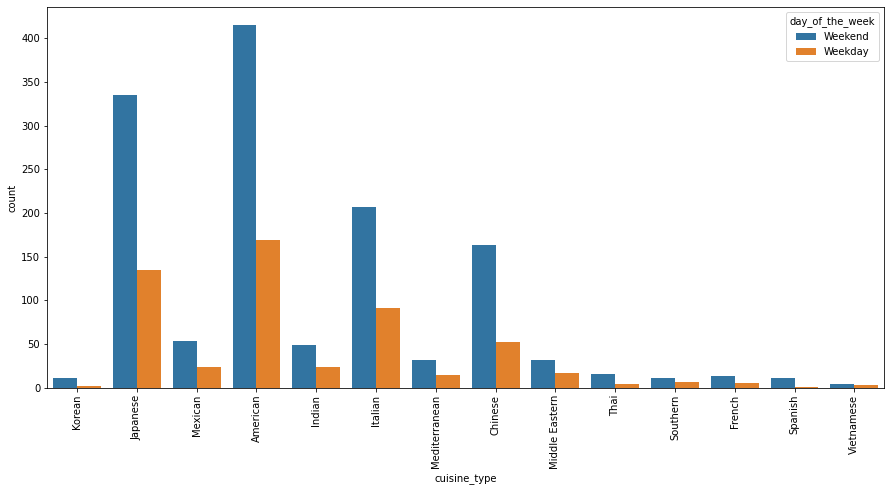

In [37]:
plt.figure(figsize=(15,7))
sns.countplot(data=df,x='cuisine_type',hue= 'day_of_the_week')
plt.xticks(rotation=90)
plt.show()

#### Observations:
All kinds of cuisines follow the same pattern when more orders on weekends are received than those on weekdays.

Most orders were for American food, followed by Japanese, Italian, Chinese, and Indian food.

#### Cuisine vs Delivery time


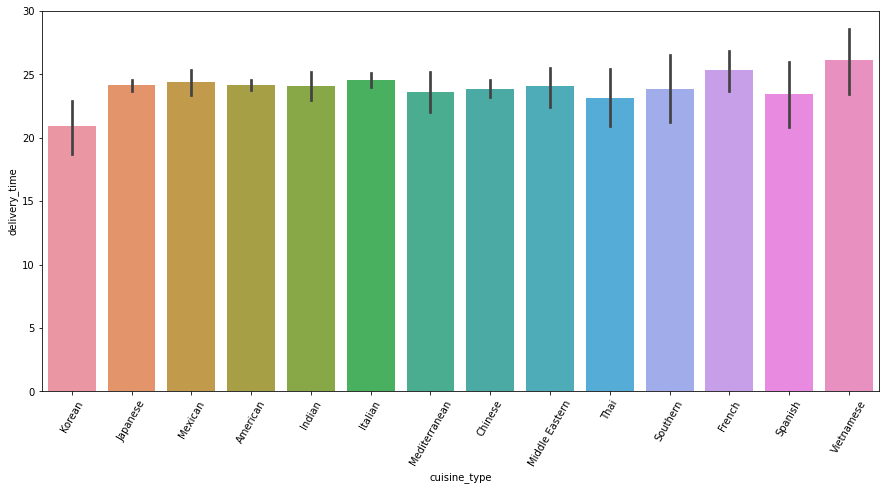

In [38]:
plt.figure(figsize=(15,7))
sns.barplot(data=df,x="cuisine_type", y="delivery_time");
plt.xticks(rotation=60);

#### Observations:
Delivery time of Vietnamese cuisine and French cuisine are longer than other cuisine.

#### Day of the Week vs Delivery time

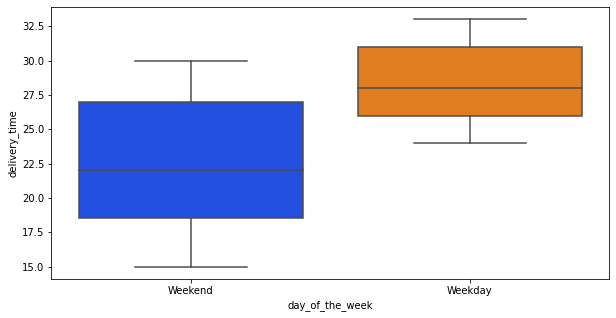

In [39]:
plt.figure(figsize=(10,5))
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df, palette = 'bright') 
plt.show()

#### Observations:
On weekdays, it takes more time to deliver all orders than it does during the weekends. This could be because more people drive on the weekdays.

#### Rating vs Delivery time

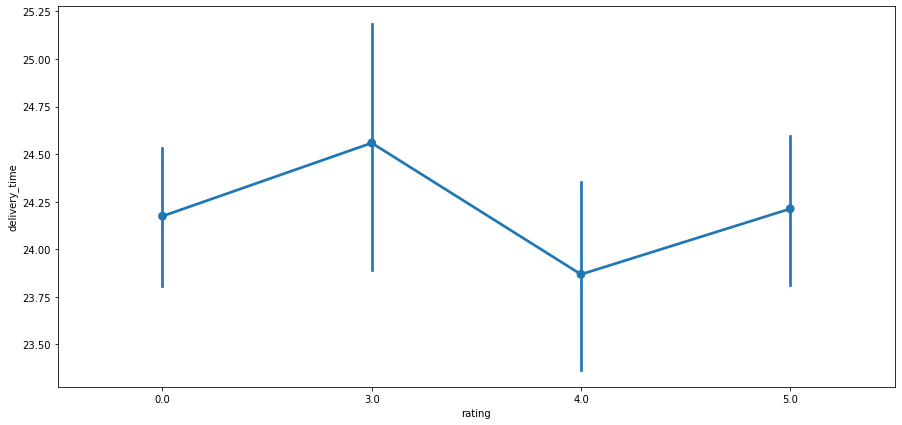

In [40]:
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

#### Observations:
There is decrease in rating (to 3) when delivery time reaches the peak of 24.5 minutes

#### Rating vs Food preparation time

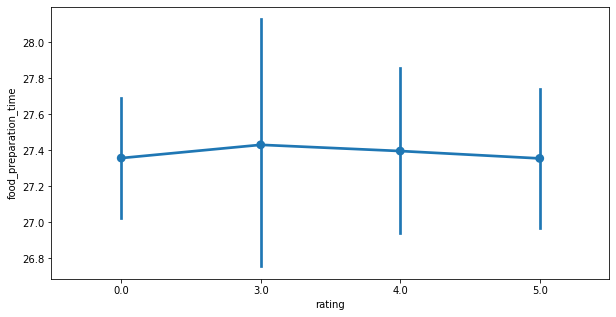

In [41]:
plt.figure(figsize=(10, 5))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)
plt.show()

#### Observations:
It seems that the low ratings of the orders have nothing to do with the food preparation time.

#### Rating vs Cost of the order

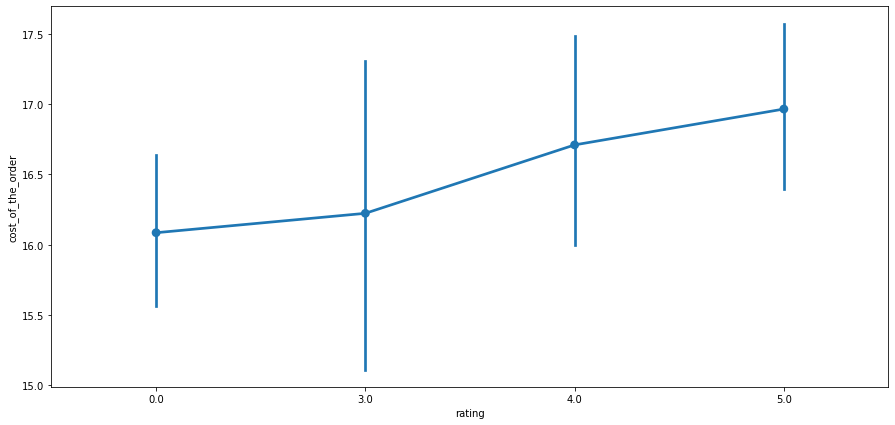

In [42]:
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df) 
plt.show()

#### Observations:
It looks like high-cost orders have been rated well while low-cost orders have not been rated.

#### The revenue generated by the restaurants

In [43]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64

#### Observations:
The above 14 restaurants are generating more than 500 dollars revenue.

Shake Shack earns the most revenue at 3579.53 dollars.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [44]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 0].copy()

#Create a data set of Restaurants with a consideration of count of rating greate than 50
rest_name_count = df.groupby(['restaurant_name'])['rating'].count().reset_index()
rest_name_count
rest_count_greater_50 = rest_name_count[rest_name_count['rating']>50]
rest_count_greater_50

,restaurant_name,rating
20,Blue Ribbon Fried Chicken,96
21,Blue Ribbon Sushi,119
109,Parm,68
121,RedFarm Broadway,59
122,RedFarm Hudson,55
136,Shake Shack,219
153,The Meatball Shop,132


In [45]:
#Create a data set of Restaurants with a consideration of mean rating greater than 4. Only filter the rated restaurants.
rest_name_count_average = rest_name_count.groupby(['restaurant_name'])['rating'].mean().reset_index()
rest_name_count_average
rest_avg_rating_more_4 = rest_name_count_average[rest_name_count_average['rating']>4]
rest_avg_rating_more_4.sort_values(by ='rating',ascending = False)

,restaurant_name,rating
136,Shake Shack,219.0
153,The Meatball Shop,132.0
21,Blue Ribbon Sushi,119.0
20,Blue Ribbon Fried Chicken,96.0
109,Parm,68.0
...,...,...
99,Mission Cantina,5.0
119,Pylos,5.0
42,Delicatessen,5.0
133,Saravanaa Bhavan,5.0


In [46]:
# Create a set of Restaurants that meet both conditions using merge
qualified_restaurants = pd.merge(rest_count_greater_50,rest_avg_rating_more_4,on ='restaurant_name')
qualified_restaurants.sort_values(by ='rating_x',ascending = False)

,restaurant_name,rating_x,rating_y
5,Shake Shack,219,219.0
6,The Meatball Shop,132,132.0
1,Blue Ribbon Sushi,119,119.0
0,Blue Ribbon Fried Chicken,96,96.0
2,Parm,68,68.0
3,RedFarm Broadway,59,59.0
4,RedFarm Hudson,55,55.0


#### Observations:
Here's a list of restaurants that could be eligible for a promotional offer in their ads:
1. Shake Shack 
2. The Meatball Shop 
3. Blue Ribbon Sushi 
4. Blue Ribbon Fried Chicken 
5. Parm 
6. RedFarm Broadway 
7. RedFarm Hudson 

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [47]:
# Create a variable to hold the revenues
revenue = 0
income = 0
# Create a Pandas series of the cost of order column
cost = pd.Series(df['cost_of_the_order'])
# Using a for-loop through the series to calculate the individual income component and adding it to the revenue variable 
for i in range(len(cost)):
    if (cost[i] > 5) & (cost[i] < 20):
        income = cost[i]*0.15
    elif (cost[i] > 20):
        income = cost[i]*0.25
    else:
        income = 0
    revenue = revenue + income
print('Net revenue generated by the company:', round(revenue,2),'dollars')

Net revenue generated by the company: 6166.3 dollars


#### Observations:
Total net reavenue for the orders greater than 20 dollars is $6166.30

#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [48]:
# Add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Compute the percentage of orders taking more than 60 minutes

percent_above60 = round((df[df['total_time'] > 60].shape[0] / df.shape[0])*100,2)

print ('The percentage of orders that have more than 60 minutes of total delivery time is', percent_above60,'%')

The percentage of orders that have more than 60 minutes of total delivery time is 10.54 %


#### Observations:
Percentage of orders take more than 60 minutes to get delivered from the time the order is 10.54%

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [49]:
Average_delivery_time = df.groupby(['day_of_the_week'])['delivery_time'].mean()
Average_delivery_time.round()

day_of_the_week
Weekday    28.0
Weekend    22.0
Name: delivery_time, dtype: float64

#### Observations:
On weekdays, the mean delivery time is about 28 minutes, while on weekends, the mean delivery time is about 22 minutes.

Hence, the weekend delivery time is less compare to weekdays.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
1. There are 736 out of 1898 orders not rated, which accounted for 38.77%.
2. The peak of the cost of orders is around 13 dollars, but there is also another slight peak around 25 dollars, so the observations are bimodal.
3. American food is the most popular, followed by Japanese and Chinese food.
4. The most expensive food is French Cuisine.
5. The most orders have been placed at Shake Shack, which is the most popular restaurant.
7. The number of orders is higher on the weekends than during the week.
8. The average amount of time it takes to deliver food on weekdays is longer than on the weekends. This could be because less people drive on the weekends.
9. Minimum cost of the order is 4.47 and maximum is 35.41 dollars.
10. Time to prepare the food once the order is placed is between 20.00 minutes and 35.00 minutes.
11. There is no skewness and outliers in delivery time, cost of food, food preparation time.
12. There is no linear relationship between the coloumns.
13. FoodHub made 6166.30 dollars in net revenue.

### Recommendations:

1. 736 of the 1898 orders weren't rated, so the restaurant should offer discounts to get customers to rate their orders or find out why they didn't rate the service. This is so that better data can be collected about the customer satisfaction and how to make service better.
2. The bimodal peak on the cost of orders may indicate a different market groups. The peak at 13 dollars may represent students, while the peak at 25 dollars may represent rich professionals. Further analysis of demographics may reveal this.
3. FoodHub should work with restaurants that serve American, Japanese, Italian, and Chinese cuisine, since these are the kinds of food that FoodHub customers like the most.
4. FoodHub should give special deals to the most-ordered restaurants, like Shake Shack, that have the highest ratings and are the most popular.
5. Since there are more orders on the weekends, more delivery people should be hired on the weekends to make sure the orders get there on time.
6. The pointplot shows that the rating dropped to 3 because of the longer delivery time. Delivery time needs to be improved to raise the rating and revenue.
7. About 10.54% of all orders have a total delivery time of more than 60 minutes. FoodHub should try to cut down on these kinds of problems as much as possible to keep customers happy. They can give a reward to the people who deliver on time.
8. Due to the heavy traffic on weekdays, promotional offers should be made to compensate the customers' loss. This will help bring in more orders during the week.

---